# Pull in the Dataset

In [16]:
import pandas as pd

# Load the dataset
data_path = '../data/raw/twcs/twcs.csv'
df = pd.read_csv(data_path)


# Basic Info and Preview

In [17]:
# Basic Info
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")
print("Coulmn names:", df.columns.tolist())

# Peep the first five rows
display(df.head())

Rows: 2811774
Columns: 7
Coulmn names: ['tweet_id', 'author_id', 'inbound', 'created_at', 'text', 'response_tweet_id', 'in_response_to_tweet_id']


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


# Missing Value Check

In [12]:
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0]

response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

# Category Distribution

In [13]:
if 'category' in df.columns:
    print(df['category'].value_counts())

# Tweet Length Stats and Histogram

count    2.811774e+06
mean     1.138897e+02
std      5.234562e+01
min      1.000000e+00
25%      7.800000e+01
50%      1.150000e+02
75%      1.390000e+02
max      5.130000e+02
Name: tweet_length, dtype: float64


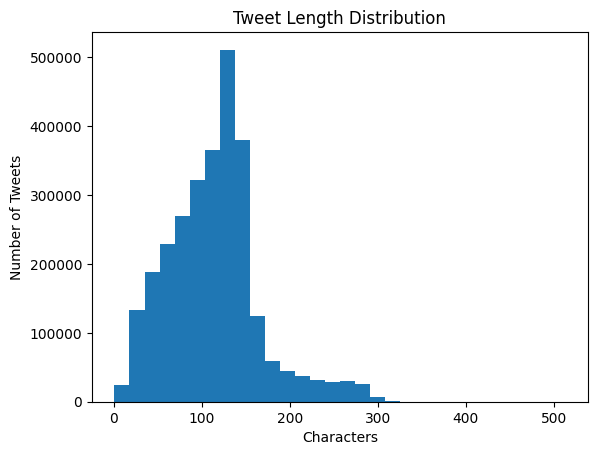

In [14]:
df['tweet_length'] = df['text'].astype(str).apply(len)
print(df['tweet_length'].describe())

import matplotlib.pyplot as plt
plt.hist(df['tweet_length'], bins=30)
plt.title("Tweet Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Number of Tweets")
plt.show()

# Cleaning Tweets

In [23]:
from scripts.preprocess import clean_tweet_text
import sys
import os

# Fixing routing issue
project_root = os.path.abspath('..')
sys.path.append(project_root)

# Apply the function to data in text column for entire dataset
# df['cleaned_text'] = df['text'].apply(clean_tweet_text)

# Apply the function to data in text column for sample dataset
df_sample = df.sample(10000)  # 10k rows
df_sample['cleaned_text'] = df_sample['text'].apply(clean_tweet_text)

# Peep the cleaned sample data 
print(df_sample[['text', 'cleaned_text']].head())

                                                      text  \
2023926  @524755 Apologies for the trouble.We have forw...   
2393226  @GWRHelp Hi Jordan, the question/statement was...   
74658    @VirginTrains Pass my comments on?! What good ...   
204620   @172883 Understood. May we ask which iOS versi...   
1054382  @268078 Nicholas, we're so sorry for the unexp...   

                                              cleaned_text  
2023926   apologies for the troublewe have forwarded yo...  
2393226   hi jordan the questionstatement was that the ...  
74658     pass my comments on what good will it do me t...  
204620    understood may we ask which ios version youre...  
1054382   nicholas were so sorry for the unexpected can...  


# Create Cleaned Tweets CSV File

In [22]:
df_sample.to_csv("../data/processed/cleaned_tweets.csv", index=False, encoding='utf-8')
print("Cleaned tweets have been saved to data/processed/cleaned_tweets.csv")

Cleaned tweets have been saved to data/processed/cleaned_tweets.csv
